# Clustering: Methods and Applications

## Introduction to Clustering
Clustering is an unsupervised machine learning technique that groups data points into clusters based on similarity. The goal is to ensure that data points within a cluster are more similar to each other than to those in other clusters.

### Key Applications:
- Customer segmentation
- Image compression
- Anomaly detection
- Document classification

---

# Distance Metrics

## Mathematical Definition

A distance metric (or metric) is a function $d: X \times X \rightarrow \mathbb{R}$ on a set $X$ that satisfies four fundamental properties:

1. **Non-negativity**
   - $d(x,y) \geq 0$ for all $x,y \in X$
   - Distance can never be negative

2. **Identity of Indiscernibles**
   - $d(x,y) = 0$ if and only if $x = y$
   - Distance is zero if and only if points are identical

3. **Symmetry**
   - $d(x,y) = d(y,x)$ for all $x,y \in X$
   - Distance is the same in both directions

4. **Triangle Inequality**
   - $d(x,z) \leq d(x,y) + d(y,z)$ for all $x,y,z \in X$
   - Direct path is never longer than indirect path
   
If the $4_{th}$ condition is respected then wer have a distance, otherwise is called dissimilarity


## Why Distance Matters

### In Supervised Learning

- k-Nearest Neighbors classification
- Kernel functions in SVMs
- Feature similarity in neural networks


### In Unsupervised Learning

- Clustering algorithms (k-means, DBSCAN)
- Manifold learning (t-SNE, UMAP)
- Anomaly detection


### In Reinforcement Learning

- State similarity measures
- Policy comparison
- Reward shaping


## Core Distance Metrics

###  Euclidean Distance
- **Formula**: $d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$
- L2 norm between two points
- Most intuitive distance measure
- Optimal for normally distributed data
- Sensitive to outliers and scale
- Boss of straight line

### 2. City Block, Manhattan Distance (L1)
- **Formula**: $d(x,y) = \sum_{i=1}^n |x_i - y_i|$
- Sum of absolute differences
- Less sensitive to outliers than Euclidean
- Natural for grid-based movement
- Used in feature selection (LASSO)
- Boss of the street

### 3. Chebyshev Distance (L∞)
- **Formula**: $d(x,y) = \max_i |x_i - y_i|$
- Maximum difference across any dimension
- Used in warehouse logistics
- Represents worst-case distance
- Common in game theory
- Boss of trading stocks

### 4. Minkowski Distance (Lp)
- **Formula**: $d(x,y) = (\sum_{i=1}^n |x_i - y_i|^p)^{\frac{1}{p}}$
- Generalization of other norms
- p = 1: Manhattan
- p = 2: Euclidean
- p = ∞: Chebyshev

## Similarity-Based Metrics

### 5. Cosine Distance
- **Formula**: $d(x,y) = 1 - \frac{\sum_{i=1}^n x_i y_i}{\sqrt{\sum_{i=1}^n x_i^2} \sqrt{\sum_{i=1}^n y_i^2}}$
- Measures angle between vectors
- Range [0,2]
- Scale-invariant
- Rulez NLP

### 6. Hamming Distance
- **Formula**: $d(x,y) = \frac{1}{n}\sum_{i=1}^n \mathbb{1}_{x_i \neq y_i}$
- Proportion of differing elements
- Used for categorical data
- Range [0,1]
- Common in error detection

### 7. Jaccard Distance
- **Formula**: $d(x,y) = 1 - \frac{|X \cap Y|}{|X \cup Y|}$
- Complement of Jaccard similarity
- Range [0,1]
- Used for binary vectors
- Common in recommendation systems
- Bff of cosine (dw about duplication)

## Statistical Metrics

### 8. Correlation Distance
- **Formula**: $d(x,y) = 1 - \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$
- Based on Pearson correlation
- Range [0,2]
- Captures linear relationships
- Scale and shift invariant

### 9. Mahalanobis Distance
- **Formula**: $d(x,y) = \sqrt{(x-y)^T \Sigma^{-1} (x-y)}$
- $\Sigma$ is the covariance matrix
- Accounts for feature correlations
- Scale-invariant
- Used in outlier detection
- Used when euclidean fails to give real distance between observation ://

## Information Theory Metrics

### 10. Kullback-Leibler Divergence
- **Formula**: $D_{KL}(P\|Q) = \sum_{i=1}^n p_i \log(\frac{p_i}{q_i})$
- Measures relative entropy
- Not symmetric
- Undefined for q(x) = 0, p(x) ≠ 0
- Used in variational inference

### 11. Jensen-Shannon Distance
- **Formula**: $JSD(P\|Q) = \frac{1}{2}D_{KL}(P\|M) + \frac{1}{2}D_{KL}(Q\|M)$
- Where M = $\frac{1}{2}(P + Q)$
- Symmetric version of KL
- Always finite
- Used in NLP and clustering

## Special Considerations

### Scale Invariance
Metrics that are invariant to scale:
- Cosine Distance
- Correlation Distance
- Mahalanobis Distance

This property is particularly important when:

Working with data in different units (meters vs kilometers)
Dealing with data that's been normalized differently
Comparing patterns rather than absolute magnitudes


Note: Not all distance measures satisfy all metric properties (e.g., KL divergence).


In [14]:
import numpy as np
from typing import Union, List, Tuple
import scipy.stats
from scipy.spatial.distance import cdist

class DistanceMetrics:
    """
    A collection of distance metrics implementations commonly used in machine learning.
    """
    
    @staticmethod
    def euclidean_distance(x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate Euclidean distance between two points.
        L2 norm: sqrt(sum((x - y)^2))
        """
        return np.sqrt(np.sum((x - y) ** 2))
    
    @staticmethod
    def manhattan_distance(x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate Manhattan (L1) distance between two points.
        Sum of absolute differences: sum(|x - y|)
        """
        return np.sum(np.abs(x - y))
    
    @staticmethod
    def chebyshev_distance(x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate Chebyshev distance between two points.
        Maximum absolute difference: max(|x - y|)
        """
        return np.max(np.abs(x - y))
    
    @staticmethod
    def minkowski_distance(x: np.ndarray, y: np.ndarray, p: int = 3) -> float:
        """
        Calculate Minkowski distance between two points.
        Generalization of Euclidean and Manhattan distances.
        p=1 gives Manhattan, p=2 gives Euclidean
        """
        return np.power(np.sum(np.abs(x - y) ** p), 1/p)
    
    @staticmethod
    def cosine_distance(x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate Cosine distance between two vectors.
        1 - cos(angle) between vectors
        """
        return 1 - np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    
    @staticmethod
    def hamming_distance(x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate Hamming distance between two vectors.
        Proportion of positions where vectors differ.
        """
        return np.mean(x != y)
    
    @staticmethod
    def jaccard_distance(x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate Jaccard distance between two sets.
        1 - intersection(x,y)/union(x,y)
        """
        intersection = np.sum(np.minimum(x, y))
        union = np.sum(np.maximum(x, y))
        return 1 - intersection / union if union != 0 else 0
    
    @staticmethod
    def correlation_distance(x: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate correlation distance based on Pearson correlation.
        1 - correlation coefficient
        """
        return 1 - np.corrcoef(x, y)[0, 1]
    
    @staticmethod
    def mahalanobis_distance(x: np.ndarray, y: np.ndarray, cov: np.ndarray = None) -> float:
        """
        Calculate Mahalanobis distance between two points.
        Accounts for covariance in the dataset.
        """
        if cov is None or np.linalg.matrix_rank(cov) < len(cov):
            # If covariance matrix is singular or None, use identity matrix
            cov = np.eye(len(x))
        
        diff = x - y
        try:
            inv_covmat = np.linalg.inv(cov)
        except np.linalg.LinAlgError:
            # Fallback to pseudo-inverse if regular inverse fails
            inv_covmat = np.linalg.pinv(cov)
        
        return np.sqrt(diff.dot(inv_covmat).dot(diff))
    
    @staticmethod
    def kullback_leibler_divergence(p: np.ndarray, q: np.ndarray) -> float:
        """
        Calculate Kullback-Leibler divergence between two probability distributions.
        Note: Not symmetric
        """
        # Add small epsilon to avoid division by zero
        epsilon = 1e-10
        p = p + epsilon
        q = q + epsilon
        p = p / p.sum()
        q = q / q.sum()
        return np.sum(p * np.log(p / q))
    
    @staticmethod
    def jensen_shannon_distance(p: np.ndarray, q: np.ndarray) -> float:
        """
        Calculate Jensen-Shannon distance between two probability distributions.
        Symmetric version of KL divergence
        """
        # Add small epsilon to avoid division by zero
        epsilon = 1e-10
        p = p + epsilon
        q = q + epsilon
        p = p / p.sum()
        q = q / q.sum()
        m = 0.5 * (p + q)
        return np.sqrt(0.5 * (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)))

def test_distances():
    """
    Test all distance metrics with more robust example data
    """
    # Create sample vectors that aren't perfectly correlated
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([2, 4, 5, 4, 5])
    
    # Create more robust dataset for covariance calculation
    data = np.array([
        [1, 2, 3, 4, 5],
        [2, 4, 5, 4, 5],
        [2, 3, 4, 4, 6],
        [1, 3, 4, 5, 4]
    ])
    
    # Initialize distance calculator
    dist = DistanceMetrics()
    
    # Calculate and print all distances
    print("\nBasic distance metrics:")
    print("----------------------")
    print(f"Euclidean distance: {dist.euclidean_distance(x, y):.4f}")
    print(f"Manhattan distance: {dist.manhattan_distance(x, y):.4f}")
    print(f"Chebyshev distance: {dist.chebyshev_distance(x, y):.4f}")
    print(f"Minkowski distance (p=3): {dist.minkowski_distance(x, y, p=3):.4f}")
    
    print("\nSimilarity-based metrics:")
    print("------------------------")
    print(f"Cosine distance: {dist.cosine_distance(x, y):.4f}")
    print(f"Hamming distance: {dist.hamming_distance(x > 3, y > 3):.4f}")
    print(f"Jaccard distance: {dist.jaccard_distance(x, y):.4f}")
    print(f"Correlation distance: {dist.correlation_distance(x, y):.4f}")
    
    # Calculate covariance matrix from the larger dataset
    cov = np.cov(data.T)
    print("\nStatistical metrics:")
    print("-------------------")
    print(f"Mahalanobis distance: {dist.mahalanobis_distance(x, y, cov):.4f}")
    
    # Normalize vectors to probability distributions
    p = x / x.sum()
    q = y / y.sum()
    print("\nInformation theory metrics:")
    print("-------------------------")
    print(f"KL divergence: {dist.kullback_leibler_divergence(p, q):.4f}")
    print(f"Jensen-Shannon distance: {dist.jensen_shannon_distance(p, q):.4f}")

if __name__ == "__main__":
    test_distances()


Basic distance metrics:
----------------------
Euclidean distance: 3.0000
Manhattan distance: 5.0000
Chebyshev distance: 2.0000
Minkowski distance (p=3): 2.5713

Similarity-based metrics:
------------------------
Cosine distance: 0.0403
Hamming distance: 0.4000
Jaccard distance: 0.2500
Correlation distance: 0.2254

Statistical metrics:
-------------------
Mahalanobis distance: 3.0000

Information theory metrics:
-------------------------
KL divergence: 0.0469
Jensen-Shannon distance: 0.1086


Overall Interpretation

- Proximity: The vectors are moderately close (Euclidean = 3.0)
- Direction: Very similar orientation (Cosine ≈ 0.04)
- Statistical Relationship: Strong correlation (Correlation distance ≈ 0.23)
- Distribution: Similar probability distributions (JS distance ≈ 0.11)

The various metrics consistently indicate that these vectors are quite similar, with:

- Similar direction (cosine distance)
- Moderate absolute differences (Euclidean/Manhattan)
- Strong correlation (correlation distance)
- Similar distributions (KL/JS distances)

# K-Means Clustering: Theoretical Foundation

## Core Concept
K-Means partitions data into k clusters by minimizing the within-cluster variance. The algorithm iteratively updates cluster centroids and assigns points to the nearest centroid.

## Mathematical Formulation
The objective function J minimizes the squared Euclidean distances:


$$J = Σᵢ₌₁ᵏ Σₓ∈Cᵢ ||x - μᵢ||²$$

where:
- μᵢ is the centroid of cluster Cᵢ
- x represents data points in cluster Cᵢ
- k is the number of clusters

## Algorithm Steps
**Initialization**: Select k points as initial centroids
   - Random selection
   - K-means++ for improved initialization

**Assignment**: Assign each point x to nearest centroid
   - $$C(i) = argmin ||x(i) - μⱼ||²$$

**Update**: Recompute centroids as cluster means
   - $$μⱼ = (1/|Cⱼ|) Σₓᵢ∈Cⱼ xᵢ$$

**Convergence**: Repeat 2-3 until either:
   - Assignments no longer change
   - Maximum iterations reached
   - Change in centroids < threshold ε

## Convergence Properties
- Guaranteed to converge locally
- Time complexity: O(nkdi)
  - n: points
  - k: clusters
  - d: dimensions
  - i: iterations

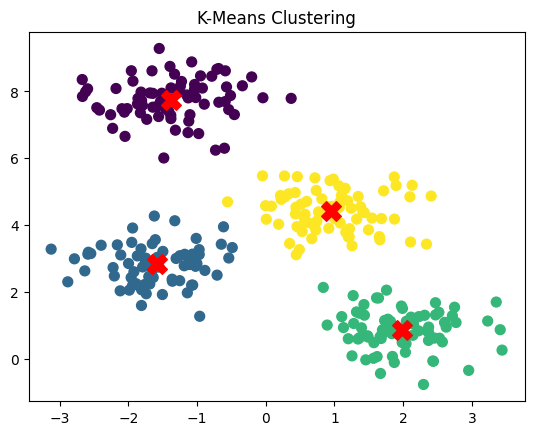

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means
kmeans = KMeans(n_clusters=4, init='random', n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.title("K-Means Clustering")
plt.show()

### Limitations:
- Sensitive to initial centroids.
- Assumes spherical clusters.


- Consider a set $X = {x_1,...,x_n}$ of n points in $R^d$
- Assume that the number k is given
- Problem:
    - Find k points $(c_1,...,c_k)$ (named centers or means) so that the cost is minimized:
    $$C_1,...,C_k$ = argmin $\sum_{i=1}^k \sum_{x\in S_i} || x-C_i||^2$$
    
    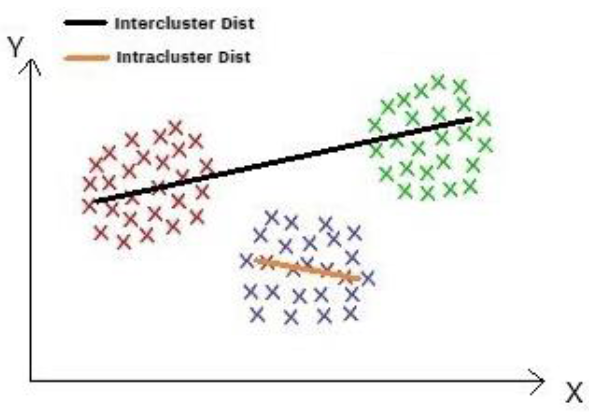

**Algorithm**
- 1. Cluster the data into k groups where k is predefined
- 2. Select k points at random as cluster centers
- 3. Assign objects to their closest cluster center according to the Euclidean distance function
- 4. Calculate the centroid or mean of all objects in each cluster 
- 5. Repeat steps 2,3 and 4 until the same points are assigned to each cluster in consecutive rounds

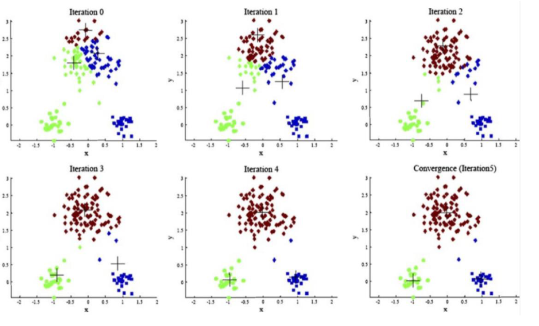

- K-means is a NP-hard problem if the dimension of the data is at least 2 ($d >=2$)

- K=1 and K=n are easy special case... why?

**Limitation**
- Different size
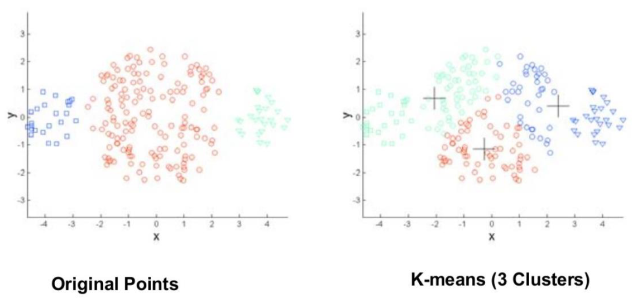

- Different density
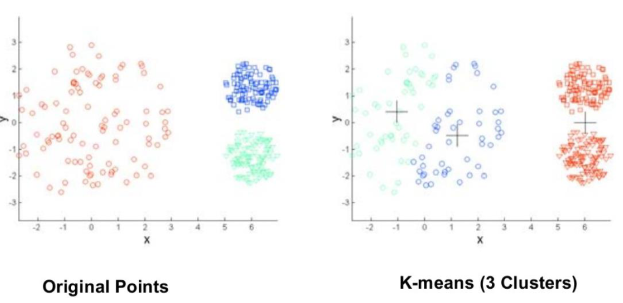

- no-spherical shapes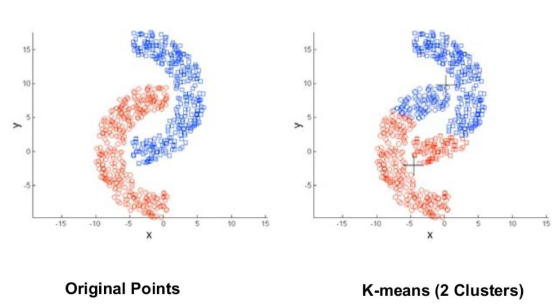

- effects of bad initialization

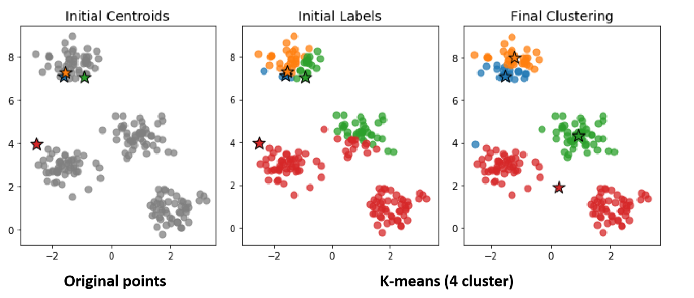

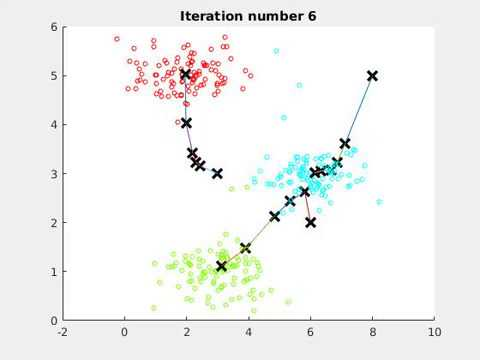

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZaHepgRIo8U', width=800, height=300)



## K-Means++: Improved Initialization

K-Means++ optimizes the initial centroid selection to reduce the risk of poor convergence. It spreads out the initial centroids to avoid local minima.

**Steps:**
1. Choose the first centroid randomly.
2. Select subsequent centroids with probability proportional to the squared distance from existing centroids.
3. Proceed with standard K-Means.


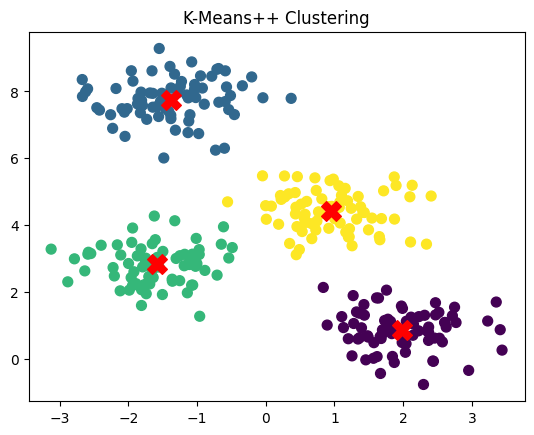

In [2]:
# Use K-Means++ initialization
kmeans_pp = KMeans(n_clusters=4, init='k-means++', n_init=10)
kmeans_pp.fit(X)
labels_pp = kmeans_pp.labels_
centroids_pp = kmeans_pp.cluster_centers_

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels_pp, cmap='viridis', s=50)
plt.scatter(centroids_pp[:, 0], centroids_pp[:, 1], c='red', s=200, marker='X')
plt.title("K-Means++ Clustering")
plt.show()

## K-Medoids Clustering

K-Medoids uses actual data points (medoids) as cluster centers instead of means. It is more robust to noise and outliers.

**Steps:**
1. Choose `k` initial medoids.
2. Assign points to the nearest medoid.
3. Update medoids by minimizing the total dissimilarity.
4. Repeat until convergence.

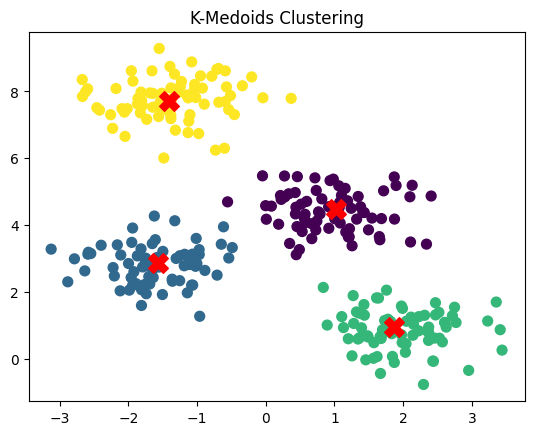

In [3]:
from sklearn_extra.cluster import KMedoids

# Apply K-Medoids
kmedoids = KMedoids(n_clusters=4, metric='euclidean', init='random')
kmedoids.fit(X)
labels_medoids = kmedoids.labels_
medoids = kmedoids.cluster_centers_

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_medoids, cmap='viridis', s=50)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, marker='X')
plt.title("K-Medoids Clustering")
plt.show()

## Best K value
- To determine the right K, draw a plot between loss vs K using elbow method
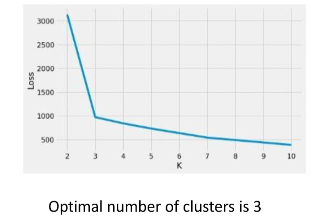

The elbow method evaluates the optimal number of clusters (k) for K-means by:

1. Running K-means with increasing k values
2. Plotting inertia (within-cluster sum of squares) vs k
3. Identifying the "elbow" point where adding clusters yields diminishing returns

Mathematical basis:

$$Inertia = Σᵢ₌₁ᵏ Σₓ∈Cᵢ ||x - μᵢ||²$$


Key characteristics:
- Inertia decreases monotonically with k
- Sharp decrease before elbow: distinct clusters
- Gradual decrease after: overfitting

Limitations:
- Subjective elbow identification
- May be unclear for complex data
- Assumes spherical clusters

Alternative methods:
- Silhouette analysis
- Gap statistic
- Cross-validation
- Domain knowledge

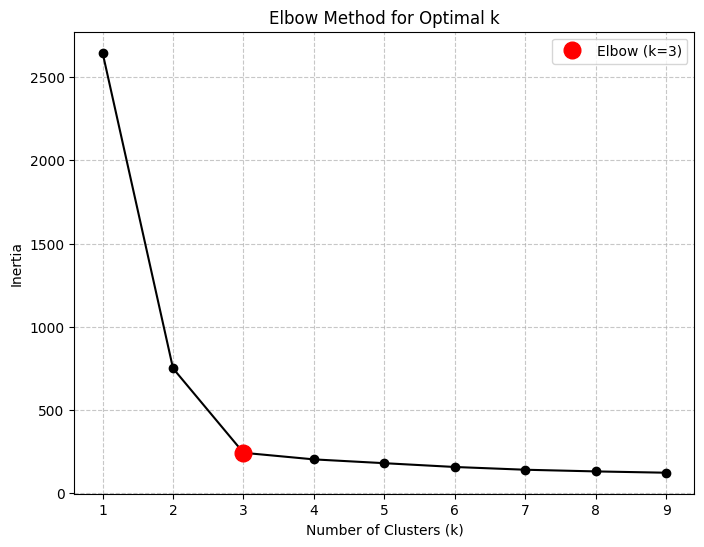

The elbow point occurs at k=3 clusters, indicating the optimal number of clusters.
- Inertia at k=3: 241.51
- Further increasing k yields diminishing returns in reducing inertia


In [8]:
# Generate synthetic 3D data with 3 clusters
np.random.seed(42)
n_samples = 300

# Create 3 clusters with different centers and standard deviations
cluster1 = np.random.normal(loc=[2, 2, 2], scale=0.5, size=(n_samples//3, 3))
cluster2 = np.random.normal(loc=[-2, -2, -2], scale=0.3, size=(n_samples//3, 3))
cluster3 = np.random.normal(loc=[0, 0, 0], scale=0.7, size=(n_samples//3, 3))

# Combine clusters
X = np.vstack([cluster1, cluster2, cluster3])

# Find optimal k using elbow method
inertias = []
ks = range(1, 10)

for k in ks:
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(ks, inertias, 'o-', color='black')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Mark elbow point
elbow_k = 3
plt.plot(elbow_k, inertias[elbow_k-1], 'ro', markersize=12, label=f'Elbow (k={elbow_k})')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ks)
plt.show()

print(f'The elbow point occurs at k={elbow_k} clusters, indicating the optimal number of clusters.')
print(f'- Inertia at k={elbow_k}: {inertias[elbow_k-1]:.2f}')
print('- Further increasing k yields diminishing returns in reducing inertia')

# DBSCAN: Density-Based Clustering

### Theory
DBSCAN groups points in dense regions and marks outliers. Key parameters:
- `eps`: Radius for neighborhood search.
- `min_samples`: Minimum points to form a dense region.

**Steps:**
1. Classify points as core, border, or noise.
2. Expand clusters from core points.



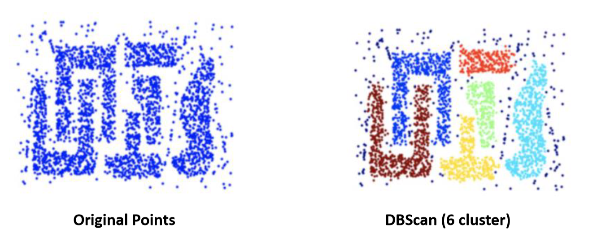

**How**
- Divides the dataset in n-dimension
- For each point in the dataset, the algorithm forms an n dimensional shape around the data point, and then counts how many data points fall within that shape
- The shape will count as a cluster
- DBScan iteratively expands the cluster by going through each individual point within the cluster, and counting the number of other data points nearby

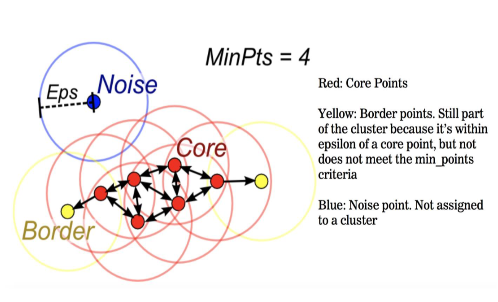

**Advantages**
- It is great at separating clusters of high density vs cluster of low density
- Handling outliers ~as a motherf****~  in a great way!

**Disadvantages**
- Issues with clusters of similar density and with high dimensionality data

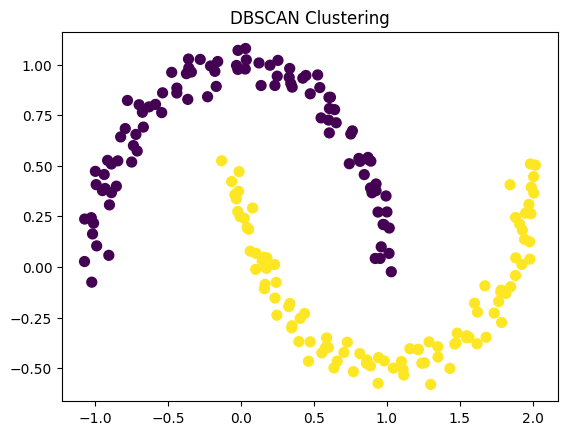

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate non-spherical data
X_moons, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5) #that's what matters!
labels_dbscan = dbscan.fit_predict(X_moons)

# Plot clusters
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.show()

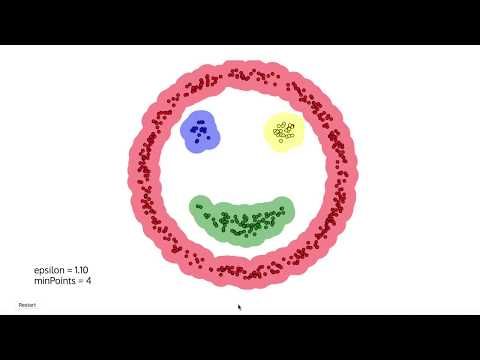

In [11]:
from IPython.display import YouTubeVideo

YouTubeVideo('_A9Tq6mGtLI', width=800, height=300) #from 2.50 


### Silhouette Score

The silhouette score measures how similar an object is to its own cluster compared to other clusters. For each data point, it calculates:

a: Average distance to other points in same cluster
b: Average distance to points in nearest neighboring cluster

The silhouette score is then: $$\frac{(b-a)}{max(a,b)}$$

Key aspects:

- Measures both cohesion (within clusters) and separation (between clusters)
- Ranges from -1 to 1
- Can be averaged across all points to evaluate overall clustering quality
- Useful for comparing different clustering parameters/algorithms
---
- 1: Means clusters are well apart from each other and clearly distinguished
- 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: Means clusters are assigned in the wrong way

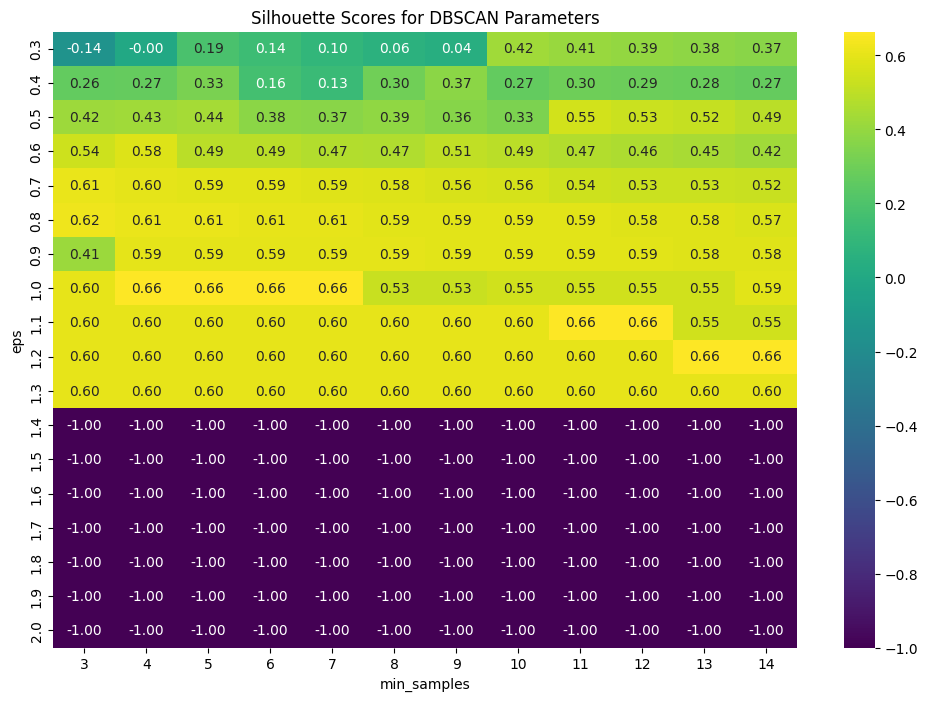

In [7]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score


import seaborn as sns
# Generate synthetic 3D data with clear clusters
np.random.seed(42)
n_samples = 300

# Create distinct clusters
cluster1 = np.random.normal(loc=[2, 2, 2], scale=0.5, size=(n_samples//3, 3))
cluster2 = np.random.normal(loc=[-2, -2, -2], scale=0.3, size=(n_samples//3, 3))
cluster3 = np.random.normal(loc=[0, 0, 0], scale=0.7, size=(n_samples//3, 3))
X = np.vstack([cluster1, cluster2, cluster3])

# Parameter grid
eps_values = np.arange(0.3, 2.1, 0.1)
min_samples_values = range(3, 15)
dbscan_params = list(product(eps_values, min_samples_values))

# Calculate silhouette scores
silhouette_scores = []
for eps, min_samples in dbscan_params:
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    if len(np.unique(clustering.labels_)) > 1:  # Skip if all points are noise
        score = silhouette_score(X, clustering.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

# Create heatmap
scores_matrix = np.array(silhouette_scores).reshape(len(eps_values), len(min_samples_values))
plt.figure(figsize=(12, 8))
sns.heatmap(scores_matrix, 
            xticklabels=min_samples_values,
            yticklabels=np.round(eps_values, 2),
            cmap='viridis',
            annot=True,
            fmt='.2f')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.title('Silhouette Scores for DBSCAN Parameters')
plt.show()

- Best performing parameters: eps around 0.8-1.2 with min_samples between 3-10, showing silhouette scores of 0.60-0.66 (yellow regions)
- Poor performance (dark purple): eps values above 1.4 have silhouette scores of -1.0, indicating invalid clustering configurations
- Moderate performance (green): lower eps values (0.3-0.7) show decent but not optimal clustering
- Sweet spot: eps ≈ 1.0-1.2 and min_samples ≈ 10-12 gives consistently good scores around 0.60-0.66

The optimal parameters appear to be around eps=1.0-1.2 and min_samples=10-12, which would provide the best cluster separation while maintaining cluster coherence.





# Hierarchical Clustering

### Theory
Hierarchical clustering builds a tree of clusters (dendrogram). Two approaches:
- **Agglomerative** (bottom-up): Merge closest clusters iteratively.
- **Divisive** (top-down): Split clusters recursively.


**How**
- At the start, treat each data point as one cluster. 
  So we will have a number of cluster equal to K
- Form a cluster by joining the two closest data points resulting in K-1 clusters.
- Form more clusters by joining the two closest clusters resulting in K-2 clusters.
- Repeat the above three steps until one big cluster is formed
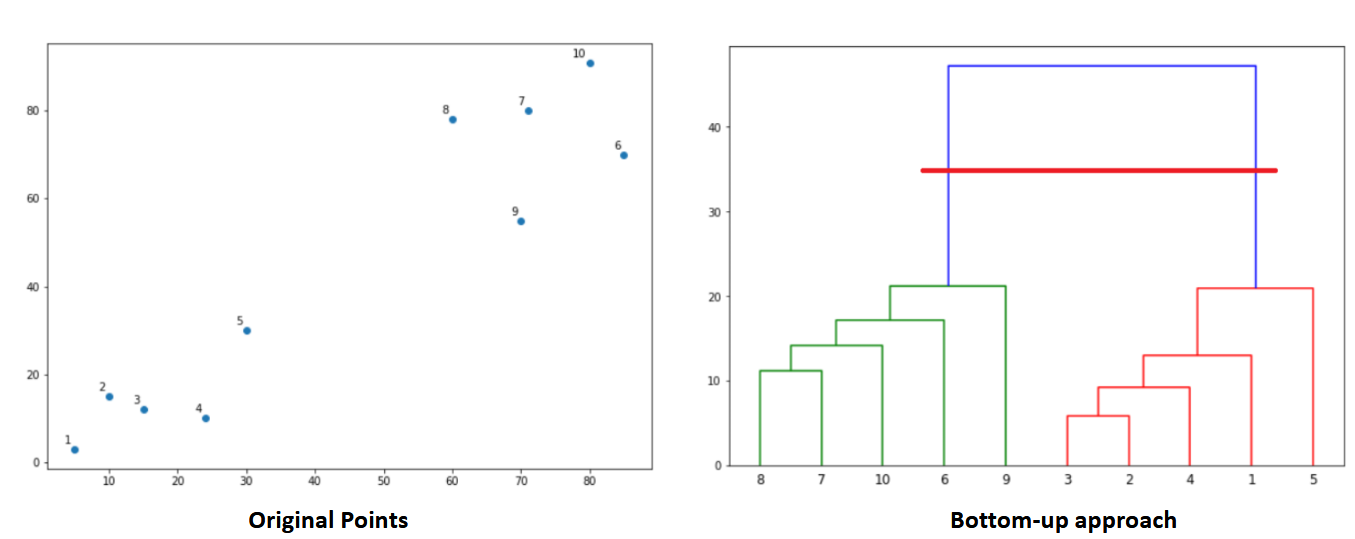

**When you applied agglomerative algorithm you should chose which linkage criterion to use** 


The linkage criterion determines which distance to use between sets of observation. 

The algorithm will merge the pairs of cluster that minimize this criterion.


- ‘ward’ minimizes the variance of the clusters being merged.

- ‘average’ uses the average of the distances of each observation of the two sets.

- ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

- ‘single’ uses the minimum of the distances between all observations of the two sets.


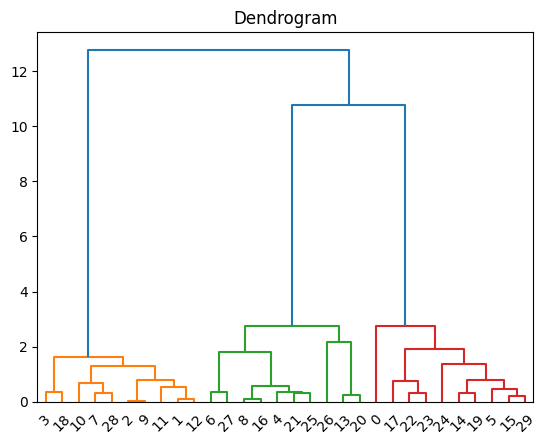

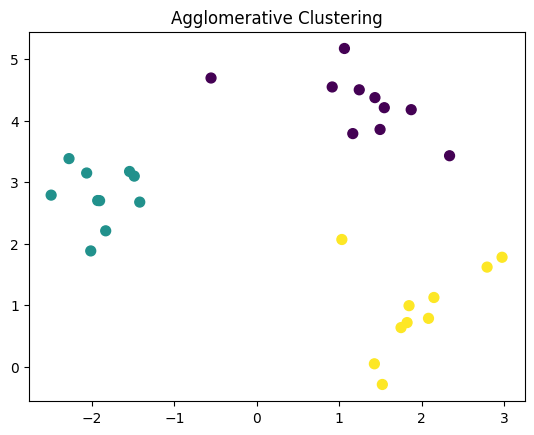

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate data
X, _ = make_blobs(n_samples=30, centers=3, cluster_std=0.60, random_state=0)

# Plot dendrogram
linked = linkage(X, method='ward')
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering")
plt.show()

# Summary of Clustering Methods

| Method          | Pros                                      | Cons                                      |
|-----------------|-------------------------------------------|-------------------------------------------|
| **K-Means**     | Fast, scalable                            | Sensitive to initial centroids            |
| **K-Medoids**   | Robust to outliers                        | Computationally expensive                 |
| **DBSCAN**      | Handles noise, arbitrary shapes           | Requires tuning of `eps` and `min_samples`|
| **Hierarchical**| No need to specify `k`, visual dendrogram | High memory complexity                    |

---

